In [1]:
#importing the libraries
#Basic Data Analysis and Data Visualization Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#some more standard libraries
import os
import warnings
warnings.filterwarnings("ignore")

In [3]:
%matplotlib inline

In [4]:
import math

In [5]:
#These are all for the classification tasks 
#Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis

In [6]:
#Regressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,BaggingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [7]:
# Modelling Helpers :
from sklearn.preprocessing import Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score

In [8]:
#preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder

In [9]:
from sklearn.impute import SimpleImputer

In [10]:
#evaluation metrics :

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  


In [11]:
#Some more visualization tools
import matplotlib.pylab as pl
import missingno as msno

In [12]:
# Configure visualisations
%matplotlib inline
import matplotlib as mpl
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)

In [13]:
# Center all plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");

In [14]:
#Extracting The Dataset
data=pd.read_csv("diamonds.csv")
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [15]:
'''
    Carat : Carat weight of the Diamond.
    Cut : Describe cut quality of the diamond.

            Quality in increasing order Fair, Good, Very Good, Premium, Ideal .

    Color : Color of the Diamond.

            With D being the best and J the worst.

    Clarity : Diamond Clarity refers to the absence of the Inclusions and Blemishes.

            (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3

    Depth : The Height of a Diamond, measured from the Culet to the table, divided by its average Girdle Diameter.
    Table : The Width of the Diamond's Table expressed as a Percentage of its Average Diameter.
    Price : the Price of the Diamond.
    X : Length of the Diamond in mm.
    Y : Width of the Diamond in mm.
    Z : Height of the Diamond in mm.

Qualitative Features (Categorical) : Cut, Color, Clarity.

Quantitative Features (Numerical) : Carat, Depth , Table , Price , X , Y, Z.'''

"\n    Carat : Carat weight of the Diamond.\n    Cut : Describe cut quality of the diamond.\n\n            Quality in increasing order Fair, Good, Very Good, Premium, Ideal .\n\n    Color : Color of the Diamond.\n\n            With D being the best and J the worst.\n\n    Clarity : Diamond Clarity refers to the absence of the Inclusions and Blemishes.\n\n            (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3\n\n    Depth : The Height of a Diamond, measured from the Culet to the table, divided by its average Girdle Diameter.\n    Table : The Width of the Diamond's Table expressed as a Percentage of its Average Diameter.\n    Price : the Price of the Diamond.\n    X : Length of the Diamond in mm.\n    Y : Width of the Diamond in mm.\n    Z : Height of the Diamond in mm.\n\nQualitative Features (Categorical) : Cut, Color, Clarity.\n\nQuantitative Features (Numerical) : Carat, Depth , Table , Price , X , Y, Z."

In [16]:
#Price is the Target Variable

In [17]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [18]:
#checking the shape of the data
data.shape

(53940, 10)

In [19]:
#Information about the data 
#it gives you all the data types involved including data types of all the attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [20]:
#description of the data
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [21]:
#examinig the number of null values if any
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

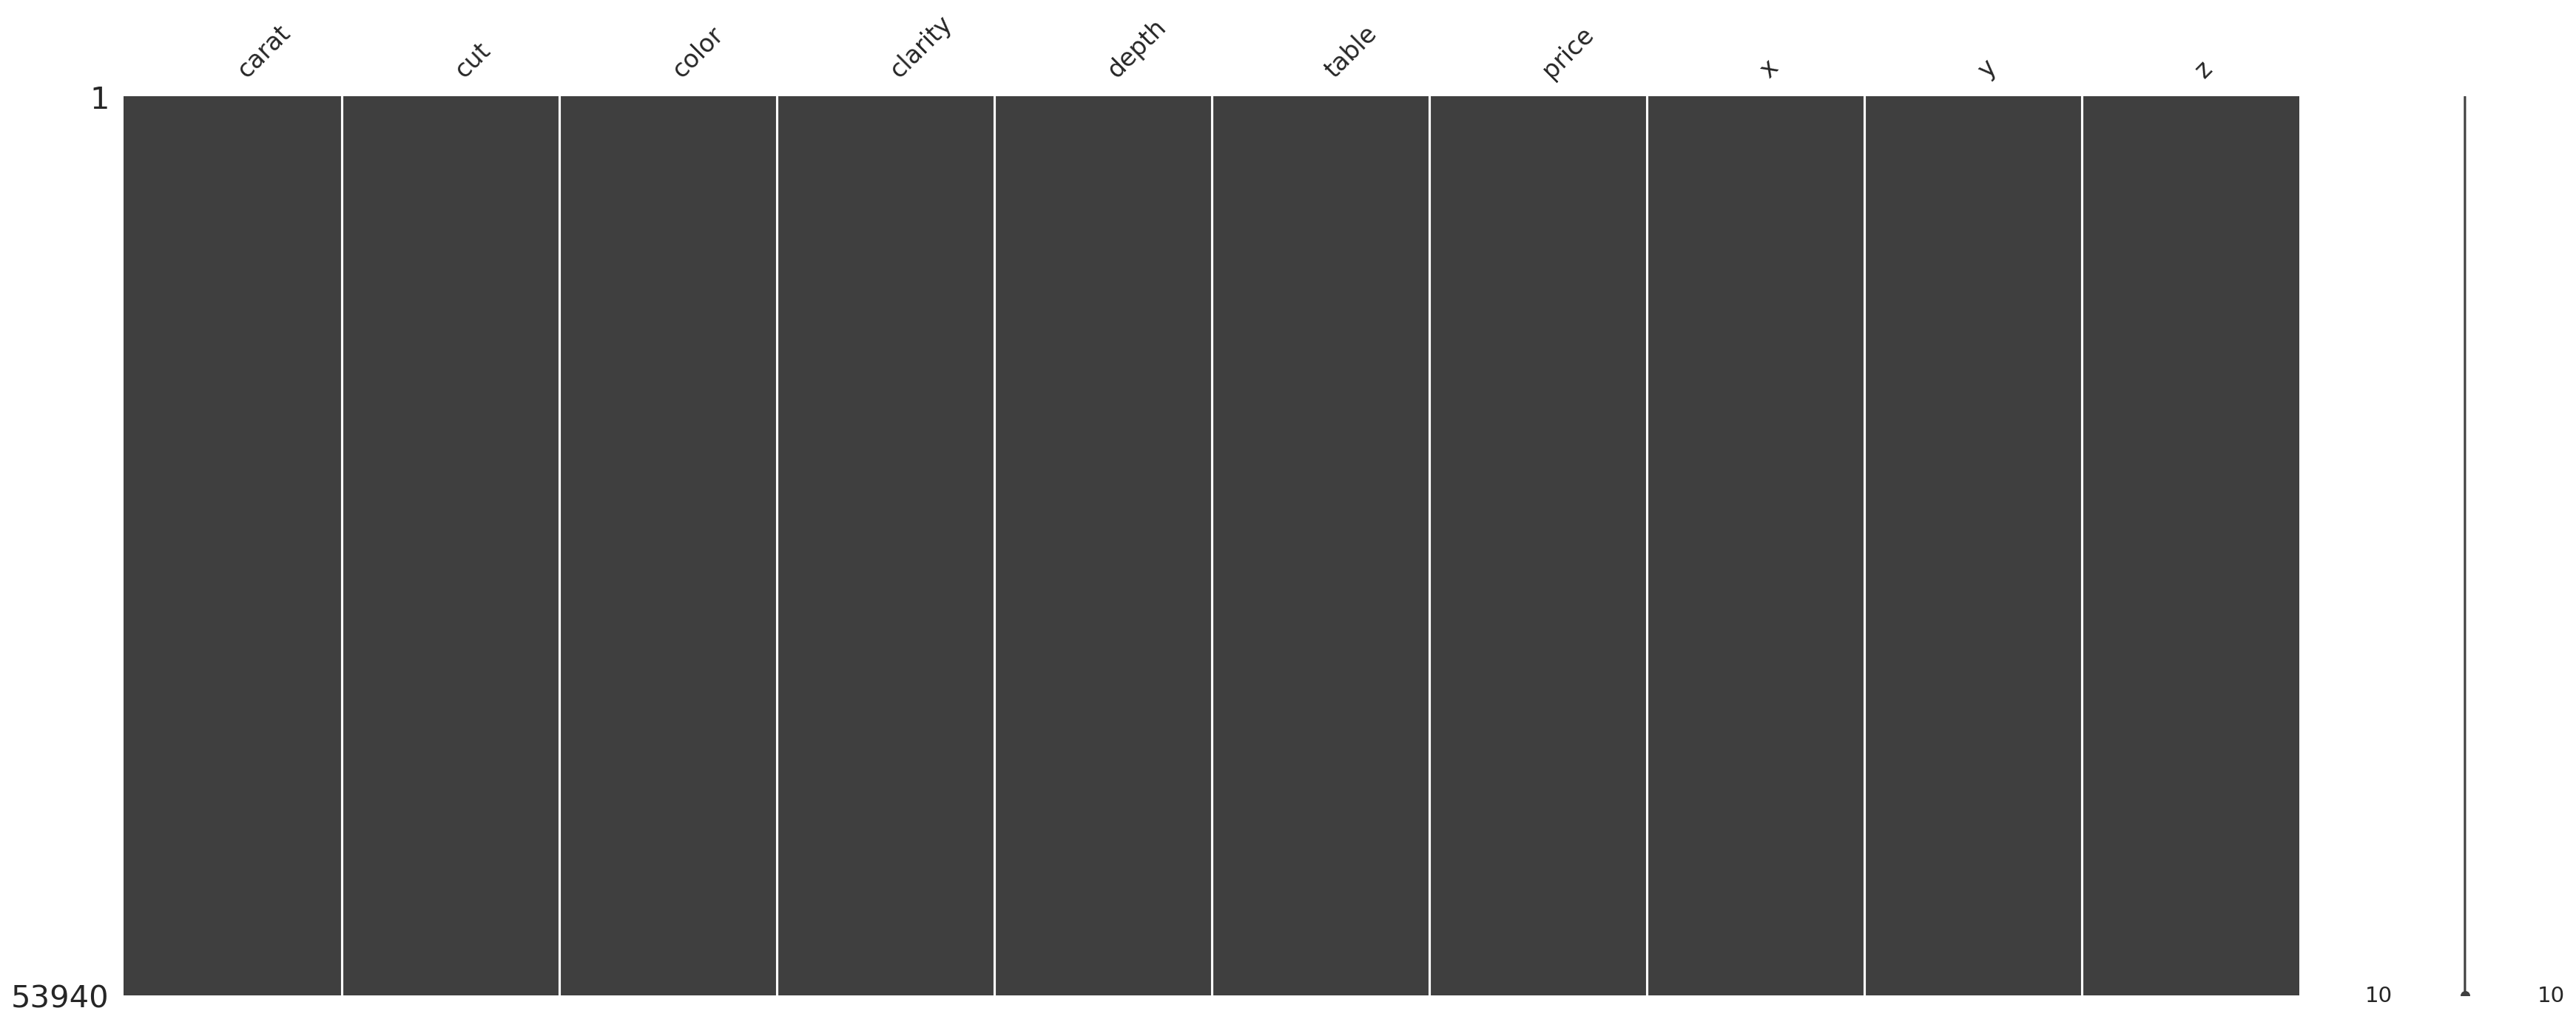

In [22]:
msno.matrix(data) # just to visualize. no missing values.

In [23]:
'''
    Do you see the Min. Values of X, Y and Z. It can't be possible
    It doesn't make any sense to have either of Length or Width or Height to be zero
'''

"\n    Do you see the Min. Values of X, Y and Z. It can't be possible\n    It doesn't make any sense to have either of Length or Width or Height to be zero\n"

In [24]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [25]:
#So we just take a look of the data having these three values zero to see if only one value is there or some other also
#there.

In [26]:
data.loc[(data['x']==0) |(data['y']==0)|(data['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [27]:
len(data[(data['x']==0) | (data['y']==0) | (data['z']==0)])
#means there are 20 rows which has zero dimensions

20

In [28]:
#We'll Drop them as it seems better choice instead of filling them with any of Mean or Median
#Because here we donot have the shortage of the data
#it seems this now
data[(data[['x','y','z']] != 0).all(axis=1)]

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [29]:
data = data[(data[['x','y','z']] != 0).all(axis=1)]

In [30]:
#confirming if there is some rows having some dimensions zero
data.loc[(data['x']==0) | (data['y']==0) | (data['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [31]:
#See there are zero rows 


In [32]:
#Scaling of all Features

In [33]:
#The all() function returns True if all items in an iterable are true, otherwise
#it returns False. If the iterable object is empty, the all() function all returns True.

In [34]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


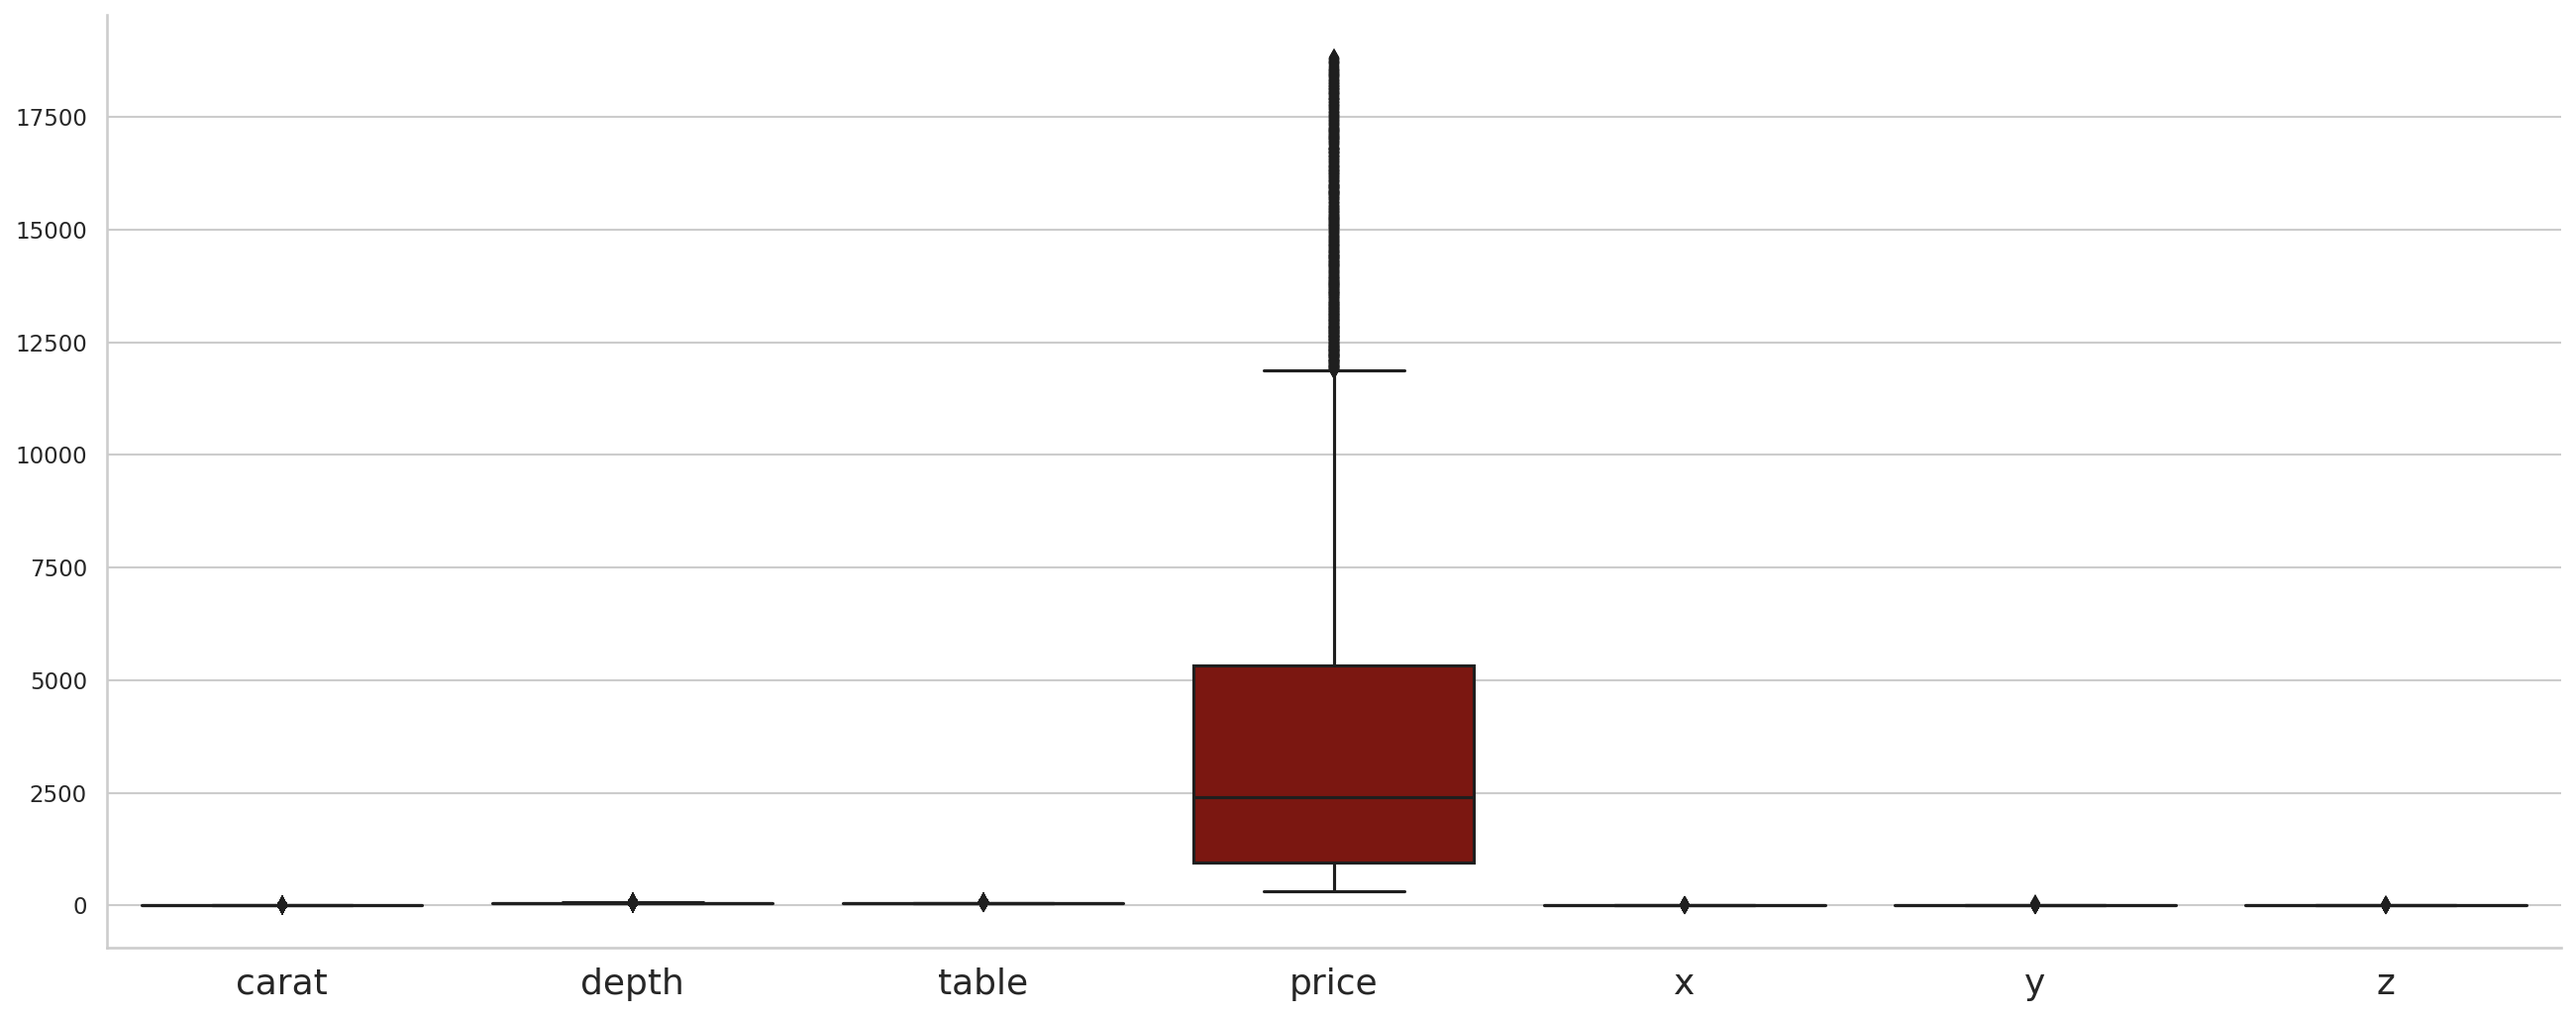

In [35]:
sns.factorplot(data=data, kind='box' , size=7, aspect=2.5)

In [36]:
#It shows that The Values are Distributed over a Small Scale.

(7.0, 0.0)

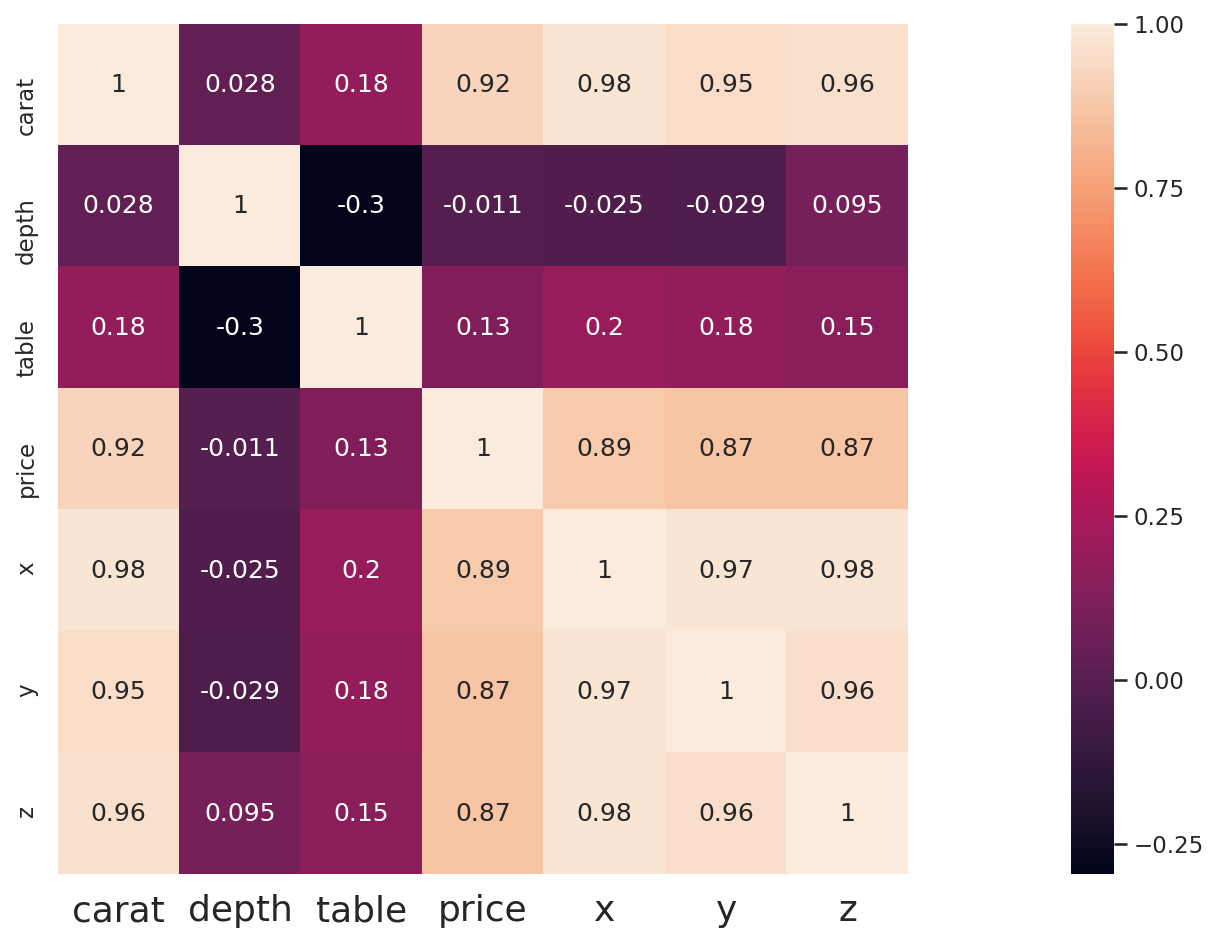

In [37]:
corr = data.corr()
ax=sns.heatmap(data=corr, square=True , annot=True,cbar=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

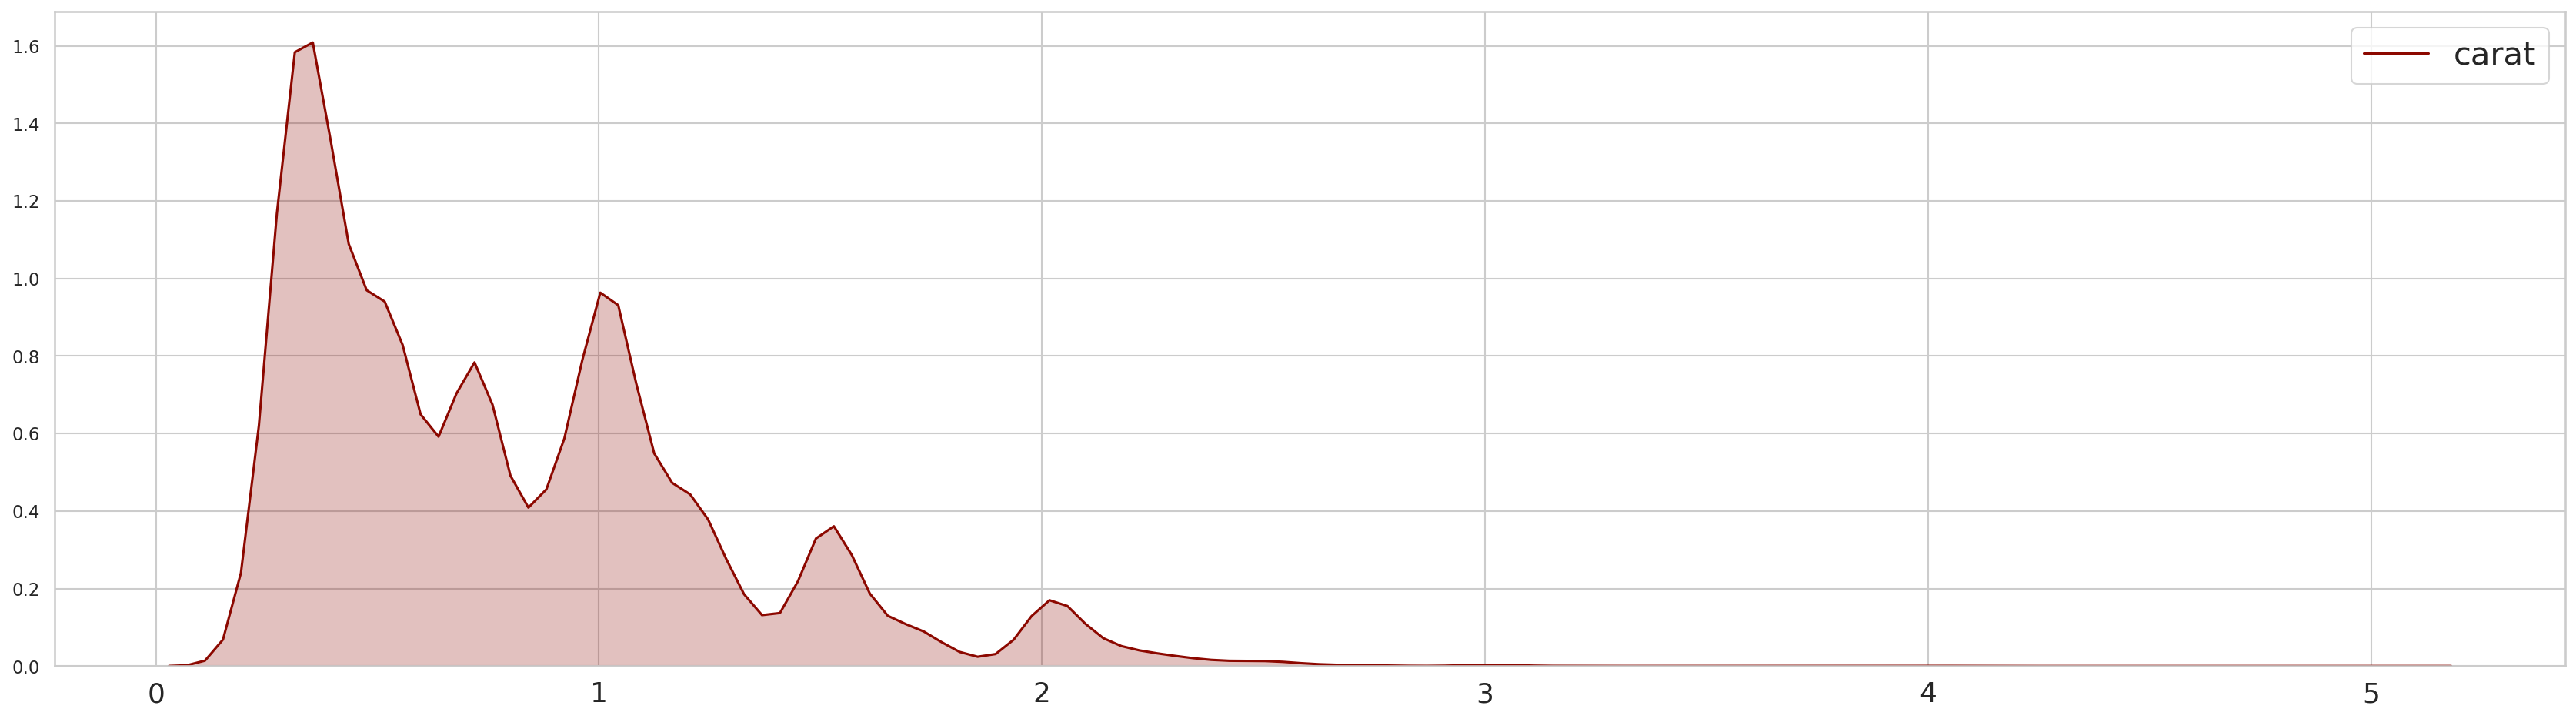

In [38]:
#Some data visulization
sns.kdeplot(data['carat'], shade=True , color='r')

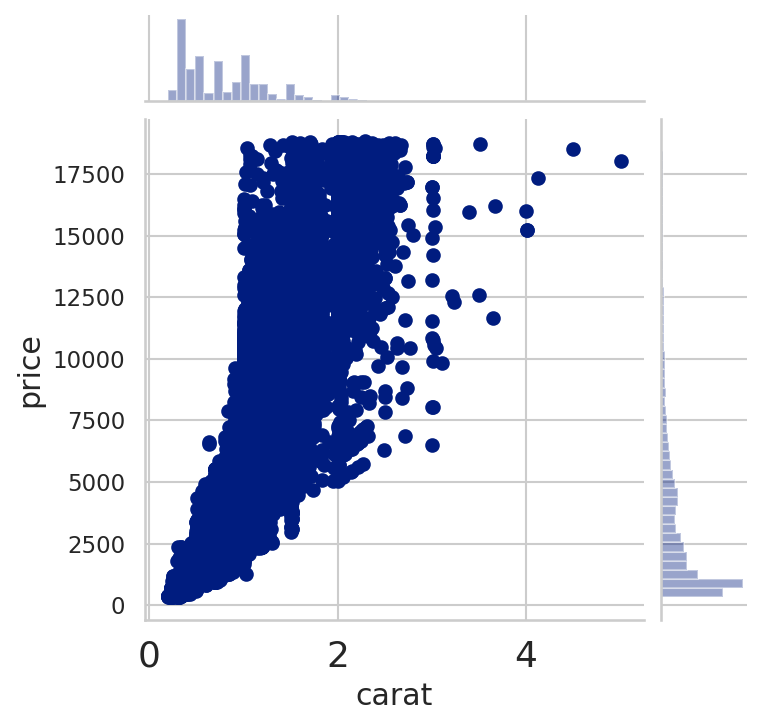

In [39]:
sns.jointplot(x='carat' , y='price' , data=data , size=5)

In [40]:
#It seems that Carat varies with Price Exponentially

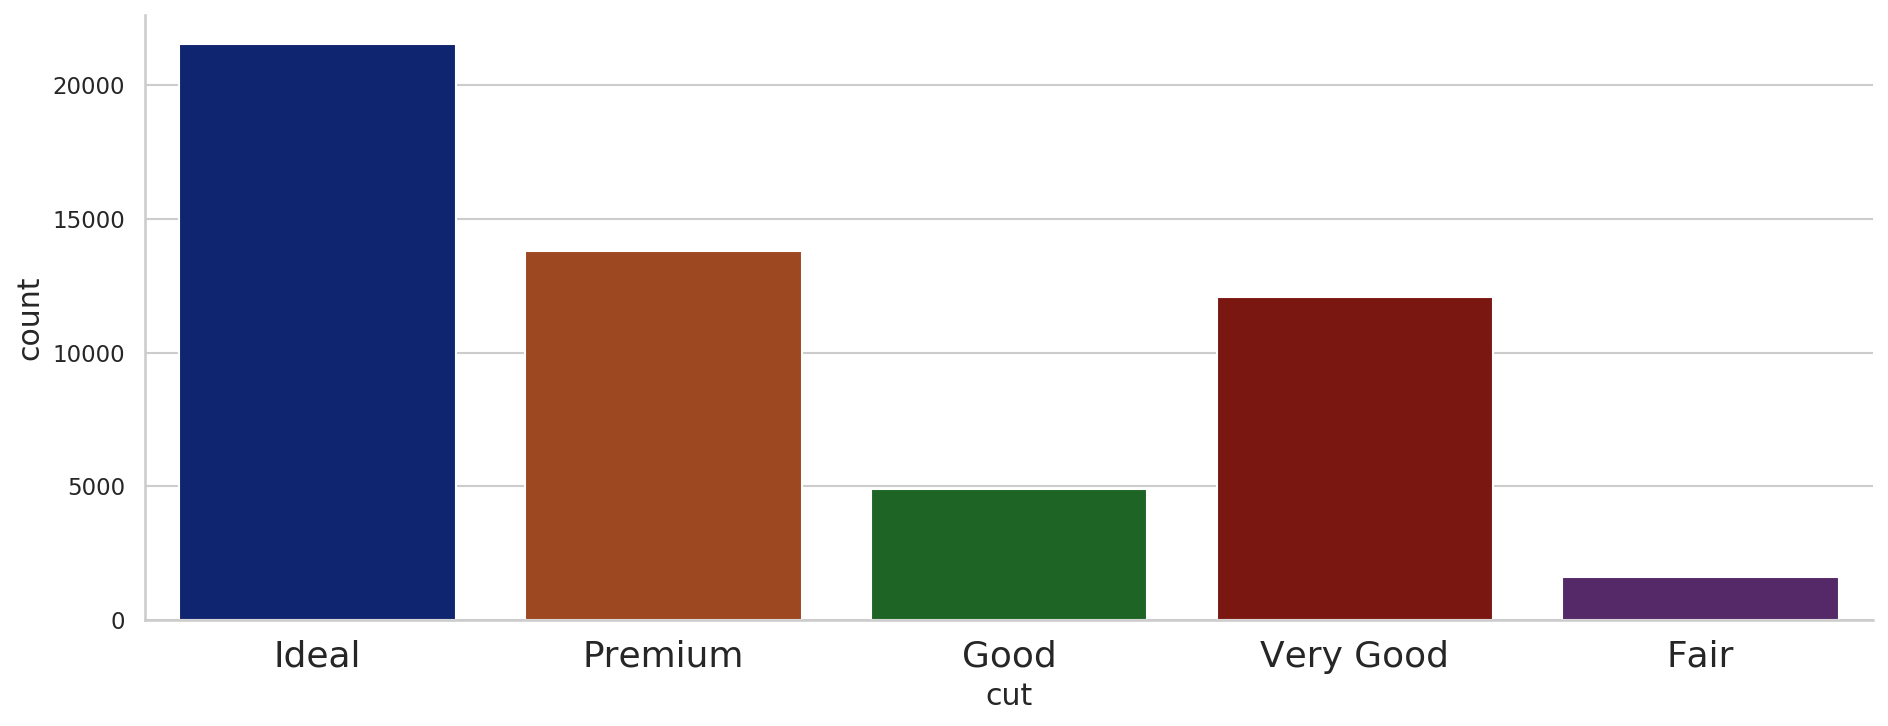

In [41]:
sns.factorplot(x='cut', data=data , kind='count',aspect=2.5 )

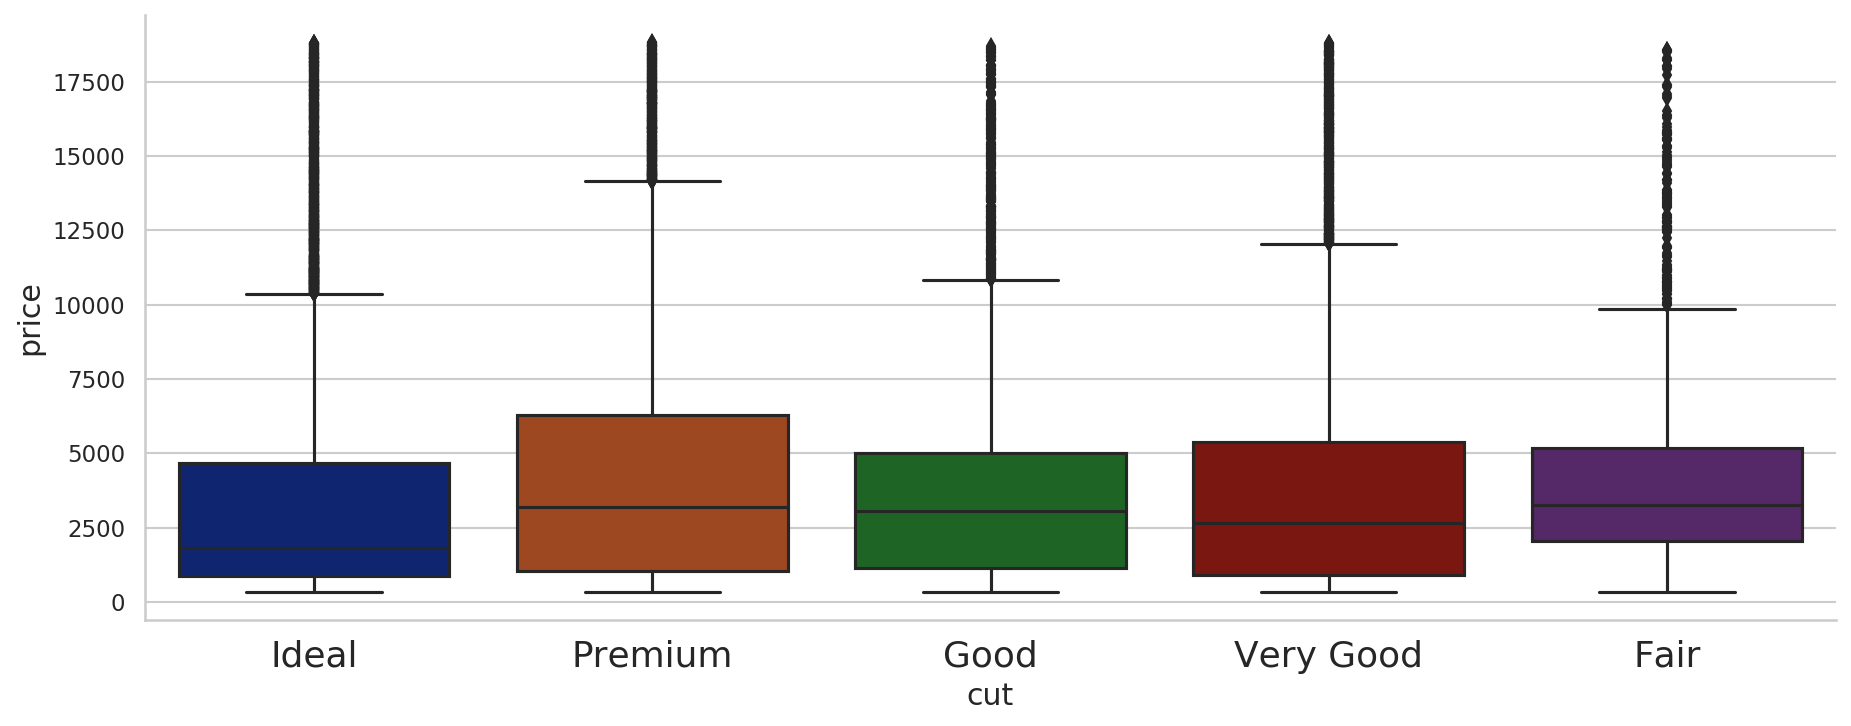

In [42]:
sns.factorplot(x='cut', y='price', data=data, kind='box' ,aspect=2.5 )

In [43]:
'''
    The Color of a Diamond refers to the Tone and Saturation of Color, or the Depth of Color in a Diamond.
    The Color of a Diamond can Range from Colorless to a Yellow or a Faint Brownish Colored hue.
    Colorless Diamonds are Rarer and more Valuable because they appear Whiter and Brighter.
'''

'\n    The Color of a Diamond refers to the Tone and Saturation of Color, or the Depth of Color in a Diamond.\n    The Color of a Diamond can Range from Colorless to a Yellow or a Faint Brownish Colored hue.\n    Colorless Diamonds are Rarer and more Valuable because they appear Whiter and Brighter.\n'

(2, 10)

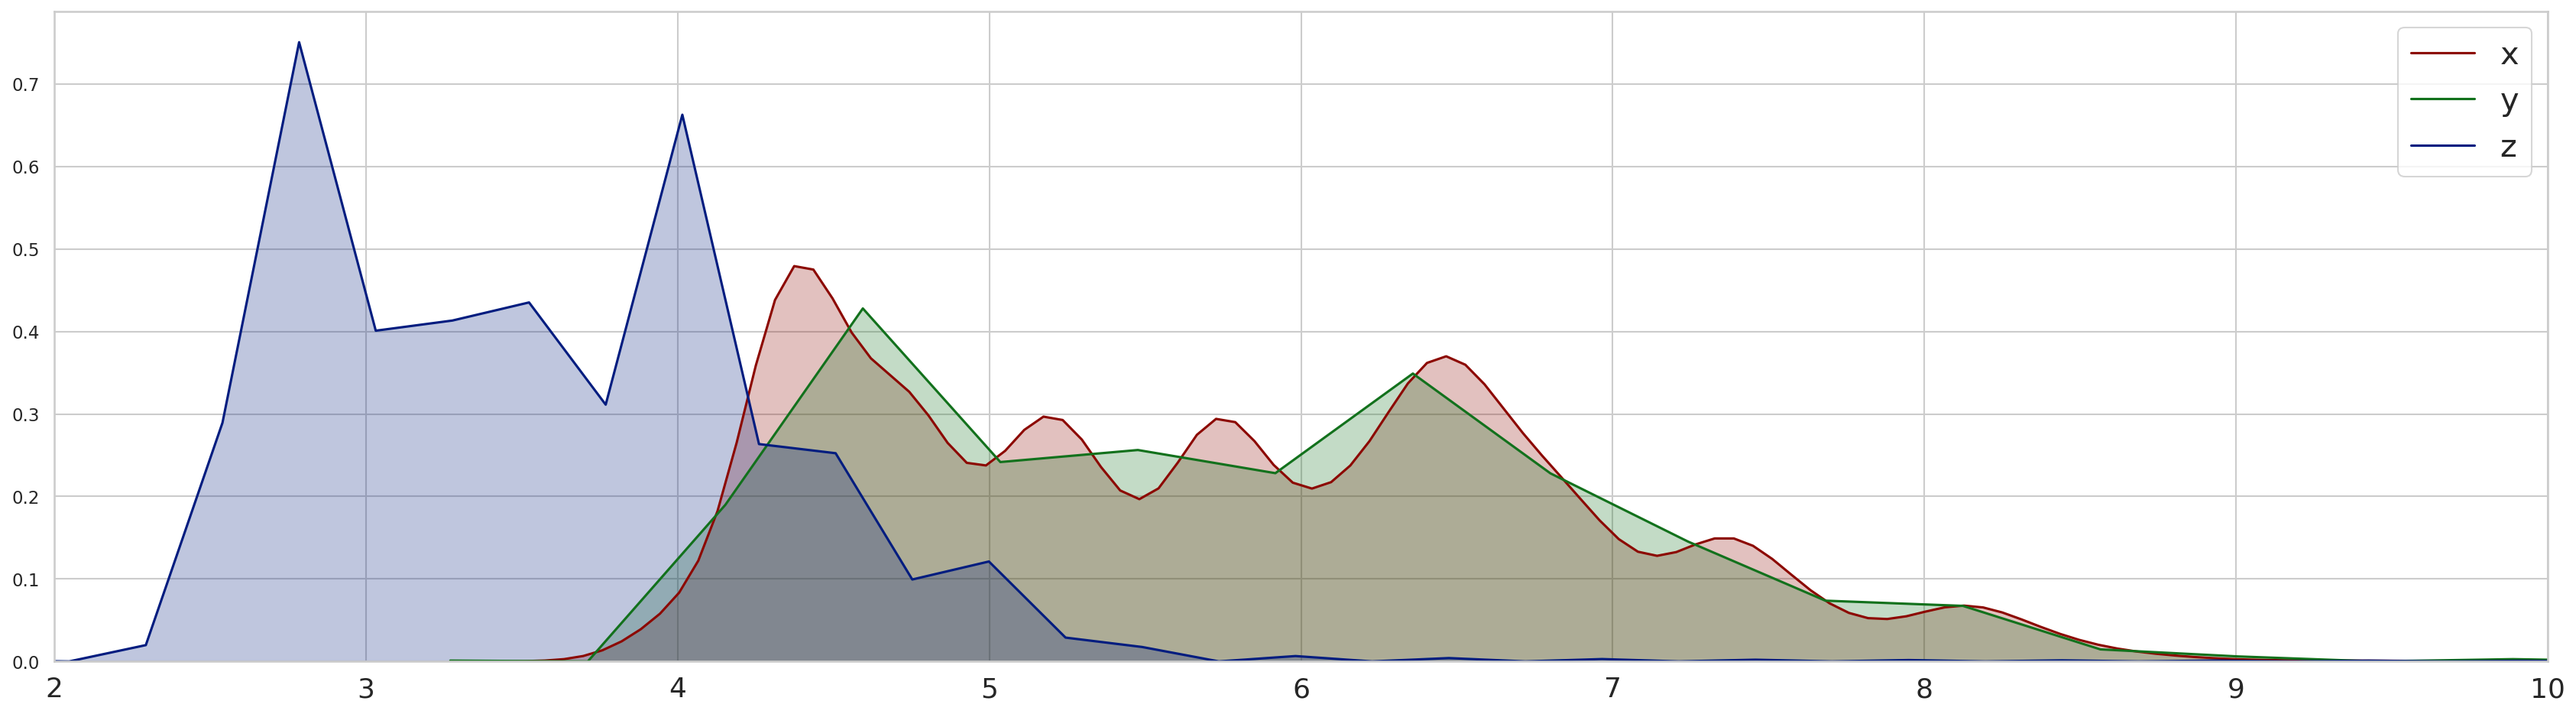

In [44]:
sns.kdeplot(data['x'] ,shade=True , color='r' )
sns.kdeplot(data['y'] , shade=True , color='g' )
sns.kdeplot(data['z'] , shade= True , color='b')
plt.xlim(2,10)

In [45]:
#Most important Step Now that is feature engineering

In [46]:
data['Volume']=data['x']*data['y']*data['z']
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,Volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


(0, 50000)

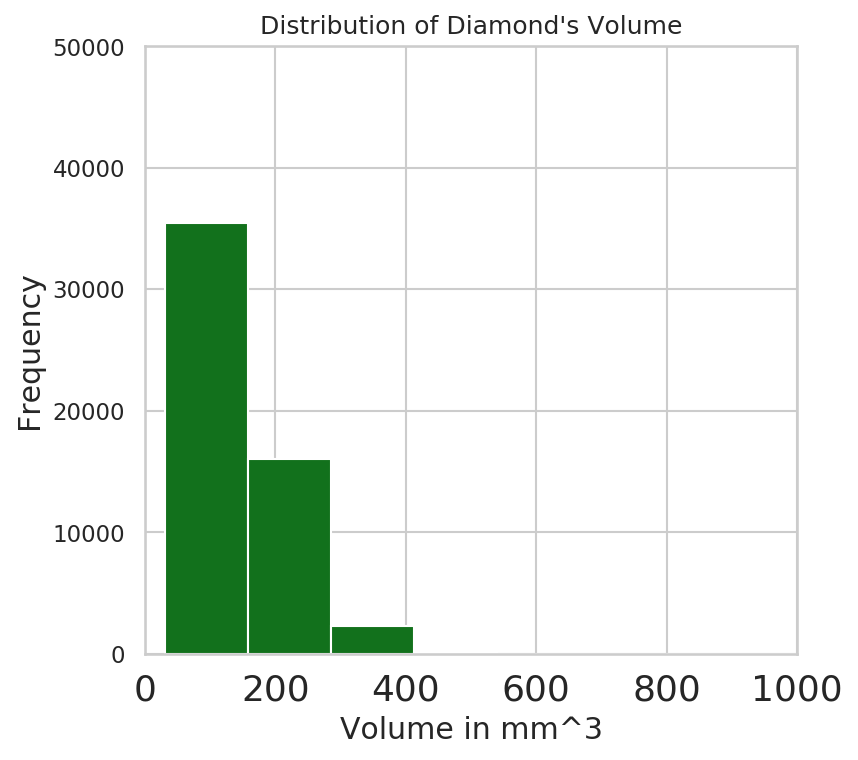

In [47]:
plt.figure(figsize=(5,5))
plt.hist( x=data['Volume'] , bins=30 ,color='g')
plt.xlabel('Volume in mm^3')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond\'s Volume')
plt.xlim(0,1000)
plt.ylim(0,50000)

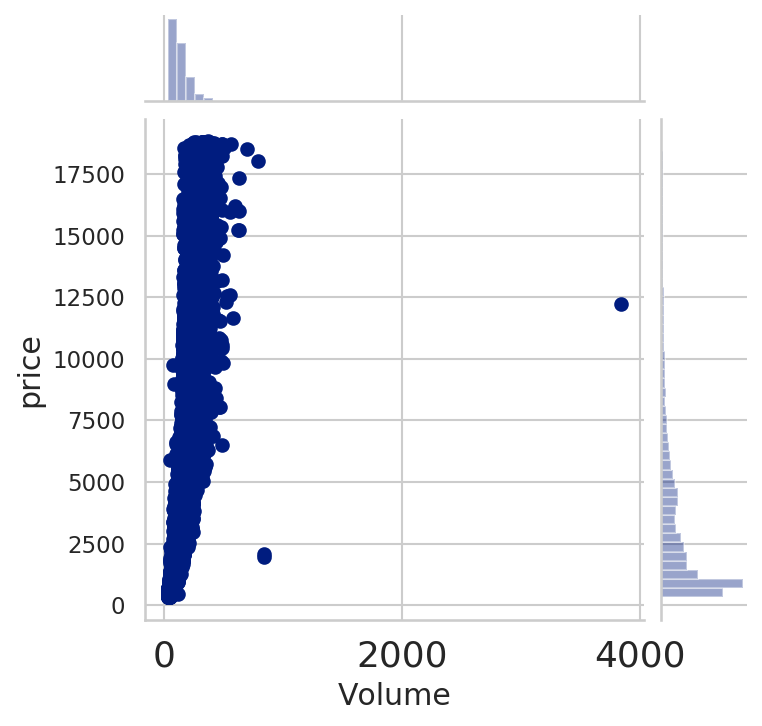

In [48]:
sns.jointplot(x='Volume', y='price' , data=data, size=5)

In [49]:
data.drop(['x','y','z'],axis=1,inplace=True)

In [50]:
data.head()

,carat,cut,color,clarity,depth,table,price,Volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


In [51]:
# Feature Encoding

 #   Label the Categorical Features with digits to Distinguish.
  #  As we can't feed String data for Modelling.



In [52]:
#make categrical variables into numerical variables using the  
label_cut = LabelEncoder()
label_color = LabelEncoder()
label_clarity = LabelEncoder()

In [53]:
data['cut'] = label_cut.fit_transform(data['cut'])
data['color'] = label_color.fit_transform(data['color'])
data['clarity'] = label_clarity.fit_transform(data['clarity'])

In [54]:
X = data.drop(['price'], axis=1)
y = data['price']

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [56]:
# Applying Feature Scaling ( StandardScaler )
# You can also Apply MinMaxScaler.

In [57]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [58]:
R2_Scores = []
models = ['Linear Regression' , 'Lasso Regression' , 'AdaBoost Regression' , 'Ridge Regression' , 'GradientBoosting Regression',
          'RandomForest Regression' ,
         'KNeighbours Regression']

In [59]:
#Algo 1 Linear Regression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
accuracies=cross_val_score(estimator=regressor,X=X_train,y=y_train,cv=5,verbose=1)
y_pred=regressor.predict(X_test)
print("#############Linear Regression################")
print("Score",regressor.score(X_test,y_test))
print(accuracies)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred)**0.5
r2=r2_score(y_test,y_pred)


print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)

#############Linear Regression################
Score 0.8725199970621851
[0.87533915 0.88099107 0.88758221 0.87993205 0.879973  ]

MSE    : 2064753.58 
MAE    : 938.54 
RMSE   : 1436.93 
R2     : 0.87 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [60]:
#Second Algo is Lasso Regression

In [61]:
regressor=Lasso(normalize=True)
regressor.fit(X_train,y_train)
accuracies=cross_val_score(estimator=regressor,X=X_train,y=y_train,cv=5,verbose=1)
y_pred=regressor.predict(X_test)
print(" ")
print("######Lasso Regression ########")
print('Score : %.4f' % regressor.score(X_test, y_test))
print(accuracies)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred)**0.5
r2=r2_score(y_test,y_pred)
print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


 
######Lasso Regression ########
Score : 0.8433
[0.86428421 0.8678543  0.87523753 0.86632291 0.86850832]

MSE    : 2537752.35 
MAE    : 923.61 
RMSE   : 1593.03 
R2     : 0.84 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished


In [62]:
#Third One AdaBoostRegressor
regressor=AdaBoostRegressor(n_estimators=1000)
regressor.fit(X_train,y_train)
accuracies=cross_val_score(estimator=regressor,X=X_train,y=y_train,cv=5,verbose=1)
y_pred=regressor.predict(X_test)
print(" ")
print("######AdaBoost Regression ########")
print('Score : %.4f' % regressor.score(X_test, y_test))
print(accuracies)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred)**0.5
r2=r2_score(y_test,y_pred)
print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.0s finished


 
######AdaBoost Regression ########
Score : 0.8586
[0.87528378 0.87142632 0.89761217 0.84818378 0.88472397]

MSE    : 2290880.55 
MAE    : 1255.48 
RMSE   : 1513.57 
R2     : 0.86 


In [63]:
#Fourth One RidgeRegressor
regressor=Ridge(normalize=True)
regressor.fit(X_train,y_train)
accuracies=cross_val_score(estimator=regressor,X=X_train,y=y_train,cv=5,verbose=1)
y_pred=regressor.predict(X_test)
print(" ")
print("######Ridge  Regression ########")
print('Score : %.4f' % regressor.score(X_test, y_test))
print(accuracies)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred)**0.5
r2=r2_score(y_test,y_pred)
print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)

 
######Ridge  Regression ########
Score : 0.7433
[0.7649422  0.76017718 0.76385326 0.76001568 0.76134937]

MSE    : 4158243.49 
MAE    : 1328.31 
RMSE   : 2039.18 
R2     : 0.74 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [64]:
#Fifth One GradientBoostingRegressor
regressor=GradientBoostingRegressor(n_estimators=100,learning_rate=1.0,max_depth=1,random_state=0,loss='ls',verbose=1)
regressor.fit(X_train,y_train)
accuracies=cross_val_score(estimator=regressor,X=X_train,y=y_train,cv=5,verbose=1)
y_pred=regressor.predict(X_test)
print(" ")
print("######Gradient Boosting Regression ########")
print('Score : %.4f' % regressor.score(X_test, y_test))
print(accuracies)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred)**0.5
r2=r2_score(y_test,y_pred)
print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)

      Iter       Train Loss   Remaining Time 
         1     6138141.8261            1.94s
         2     4089470.0992            1.76s
         3     3597055.3532            1.66s
         4     3142541.3209            1.57s
         5     2828991.4920            1.53s
         6     2606259.4564            1.50s
         7     2458570.4580            1.47s
         8     2252037.3439            1.47s
         9     2105783.3472            1.47s
        10     2010583.4501            1.44s
        20     1558708.7516            1.38s
        30     1370161.7190            1.20s
        40     1268886.3624            0.99s
        50     1212900.2863            0.80s
        60     1178602.2856            0.63s
        70     1149860.3063            0.48s
        80     1128098.0809            0.32s
        90     1113513.7342            0.16s
       100     1100867.3112            0.00s
      Iter       Train Loss   Remaining Time 
         1     6177542.2239            1.14s
        

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


        20     1565788.5409            1.19s
        30     1381339.1120            1.07s
        40     1275672.0868            0.87s
        50     1215798.0903            0.69s
        60     1180086.6416            0.56s
        70     1153248.7118            0.43s
        80     1132108.1020            0.28s
        90     1118831.3269            0.14s
       100     1104949.7081            0.00s
      Iter       Train Loss   Remaining Time 
         1     6113036.5877            1.71s
         2     3973669.0614            1.59s
         3     3477895.2087            1.56s
         4     3021601.2554            1.51s
         5     2742655.2121            1.50s
         6     2535810.9688            1.48s
         7     2405293.2096            1.49s
         8     2202723.7016            1.47s
         9     2066099.3712            1.47s
        10     1976436.6277            1.44s
        20     1541176.0239            1.18s
        30     1376612.4879            0.95s
        4

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.6s finished


In [65]:
#Sixth One RandomForestRegressor
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)
accuracies=cross_val_score(estimator=regressor,X=X_train,y=y_train,cv=5,verbose=1)
y_pred=regressor.predict(X_test)
print(" ")
print("######RandomForest Regression ########")
print('Score : %.4f' % regressor.score(X_test, y_test))
print(accuracies)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred)**0.5
r2=r2_score(y_test,y_pred)
print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   54.4s finished


 
######RandomForest Regression ########
Score : 0.9826
[0.98027769 0.97890831 0.98109274 0.97945356 0.97870771]

MSE    : 282588.79 
MAE    : 275.67 
RMSE   : 531.59 
R2     : 0.98 


In [66]:
#Tuning Parameters

In [67]:
no_of_test=[100]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
regressor=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='r2')
regressor.fit(X_train,y_train)
print('Score : %.4f' % regressor.score(X_test, y_test))
pred=regressor.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)

Score : 0.9824
R2     : 0.98 


In [68]:
#Seventh one Kneihbours Regression

In [69]:
regressor=KNeighborsRegressor()
regressor.fit(X_train,y_train)
accuracies=cross_val_score(estimator=regressor,X=X_train,y=y_train,cv=5,verbose=1)
y_pred=regressor.predict(X_test)
print(" ")
print("######Kneighbors Regression ########")
print('Score : %.4f' % regressor.score(X_test, y_test))
print(accuracies)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred)**0.5
r2=r2_score(y_test,y_pred)
print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.5s finished


 
######Kneighbors Regression ########
Score : 0.9558
[0.95469521 0.95384507 0.95751362 0.95472812 0.95210407]

MSE    : 715989.71 
MAE    : 438.49 
RMSE   : 846.16 
R2     : 0.96 


In [70]:
n_neighbors=[]
for i in range (0,50,5):
    if(i!=0):
        n_neighbors.append(i)
params_dict={'n_neighbors':n_neighbors,'n_jobs':[-1]}
classifier=GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params_dict,scoring='r2')
classifier.fit(X_train,y_train)
print('Score : %.4f' % classifier.score(X_test, y_test))
pred=classifier.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)

Score : 0.9558
R2     : 0.96 


In [71]:
compare = pd.DataFrame({'Algorithms' : models , 'R2-Scores' : R2_Scores})
compare.sort_values(by='R2-Scores' ,ascending=False)

,Algorithms,R2-Scores
5,RandomForest Regression,0.982358
6,KNeighbours Regression,0.955794
4,GradientBoosting Regression,0.928123
0,Linear Regression,0.872520
2,AdaBoost Regression,0.858559
1,Lasso Regression,0.843317
3,Ridge Regression,0.743266


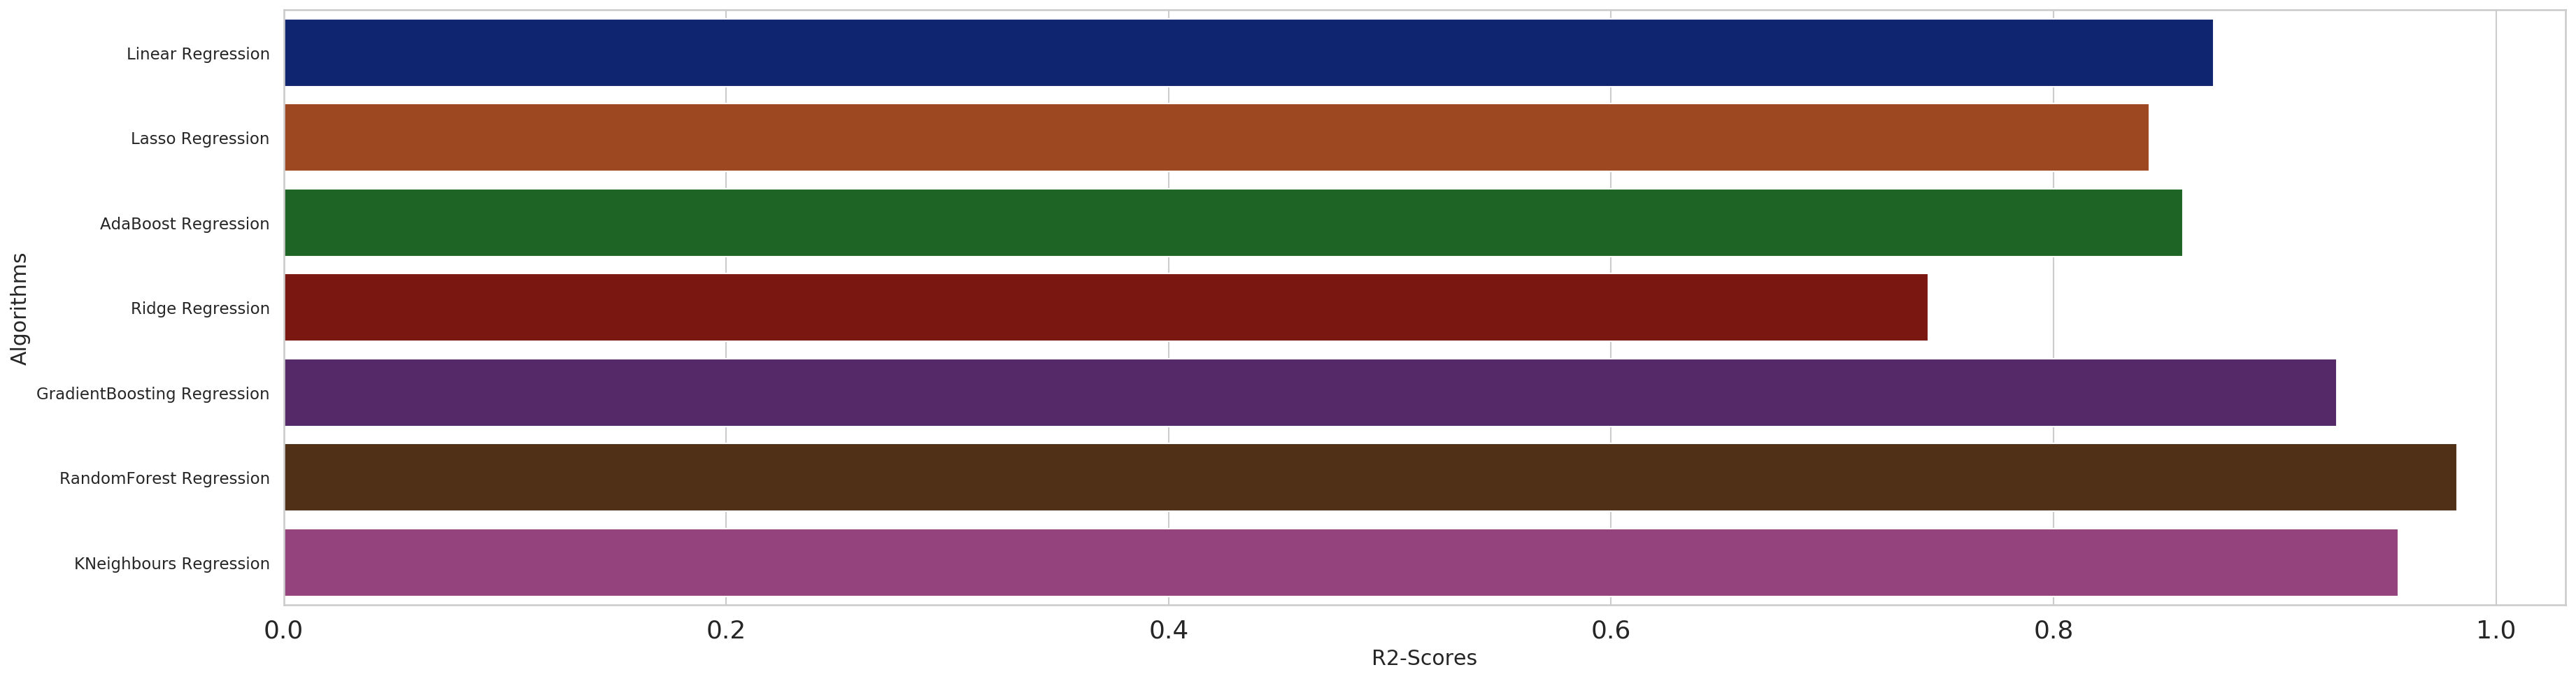

In [72]:
sns.barplot(x='R2-Scores' , y='Algorithms' , data=compare)

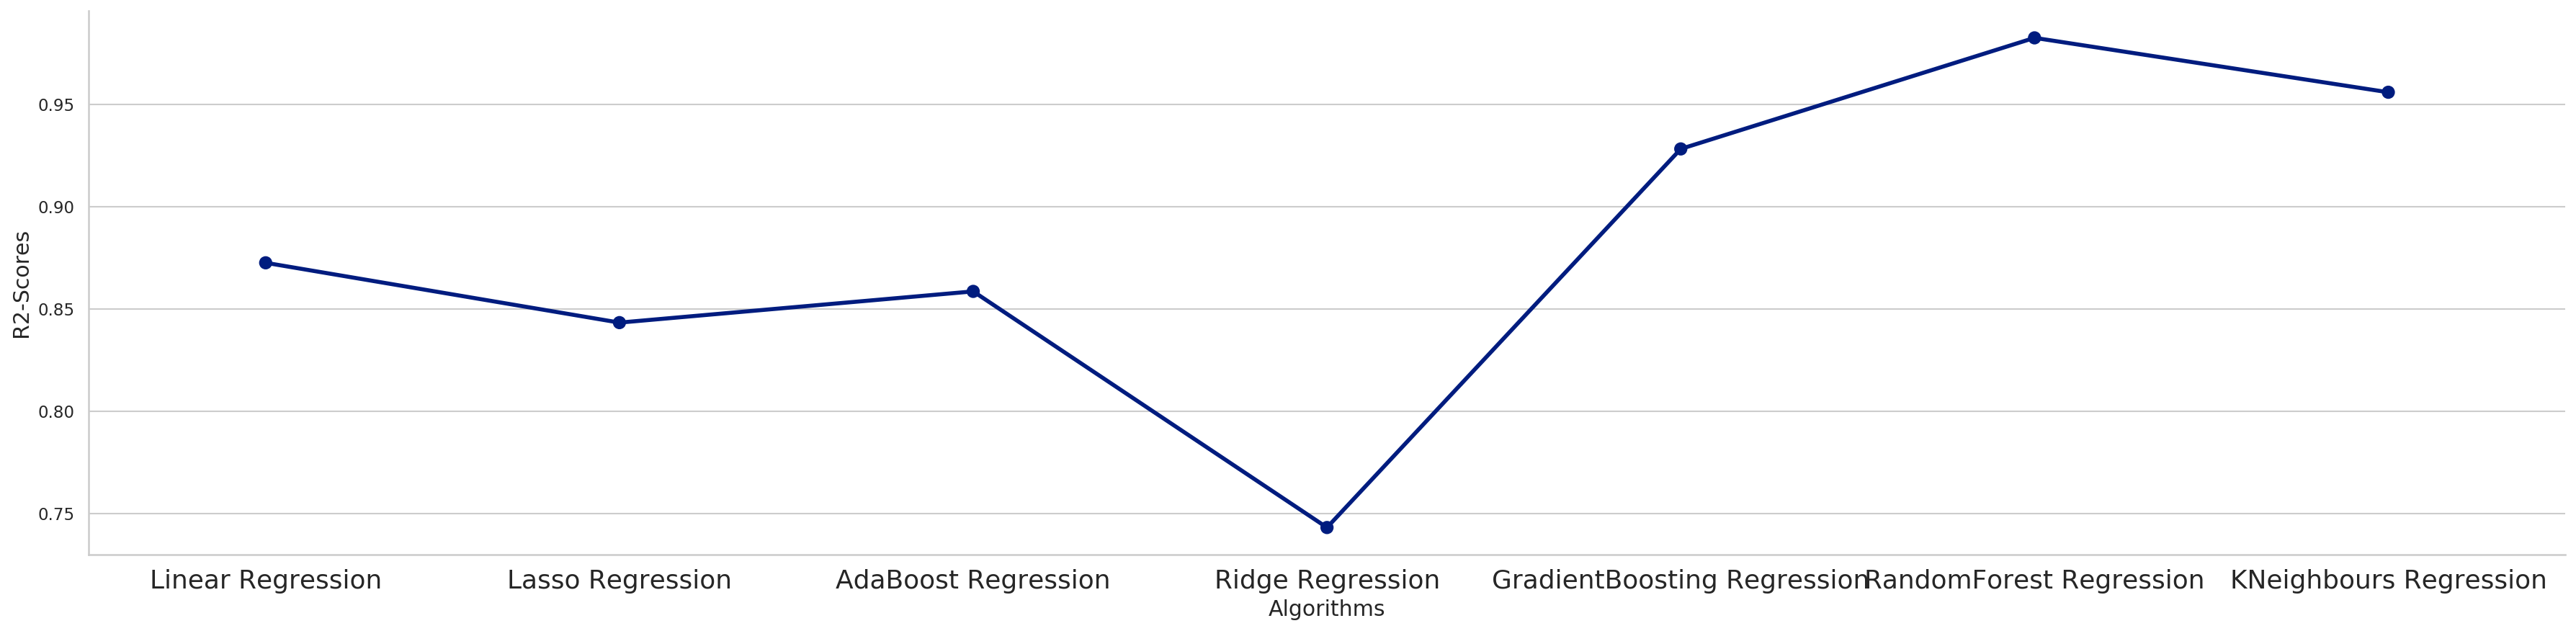

In [73]:
sns.factorplot(x='Algorithms', y='R2-Scores' , data=compare, size=6 , aspect=4)

In [74]:
#This is the end of this data analysis and modeliing....